# Project Productie Proces
- Carlo Dieltjens - Raf Mesotten - Yannick Pottiez
- April 2024

#### Import necessary external libraries

In [1]:
import pandas as pd
import numpy as np
import os
import json
import matplotlib.pyplot as plt 

#### Define input and output paths

In [2]:
# mappenstructuur: projectmap > data > input
input_path = os.path.join('..', 'data', 'input')

# mappenstructuur: projectmap > data > output
output_path = os.path.join('..', 'data', 'output')

# absolute_path = os.path.abspath(input_path)
# print(absolute_path)

In [3]:
df = pd.read_json(os.path.join(input_path, 
                               'data_productie', 
                               'daily_production', 
                               'BRU', 
                               '20180101.json'), 
                  orient='index')
df

,0
DoW,Monday
hour,1
minute,0
date,01-01-2018 00:00:00.0000
maintenance,No
prod_loss,61
prod_loss_perc,5
production,1183


In [4]:
# Definieer het pad naar de map met de JSON-bestanden
map_pad = os.path.join(input_path, 'data_productie', 'daily_production', 'BRU')

# Lijst om DataFrames van alle JSON-bestanden op te slaan
dataframes = []

# Itereer over alle bestanden in de map
for bestandsnaam in os.listdir(map_pad):
    if bestandsnaam.endswith(".json"):  # Alleen JSON-bestanden verwerken
        # Volledig pad naar het JSON-bestand
        volledig_pad = os.path.join(map_pad, bestandsnaam)
        
        # JSON-bestand inlezen als DataFrame
        with open(volledig_pad, 'r') as f:
            json_data = json.load(f)
            df = pd.DataFrame([json_data])
        
        # DataFrame toevoegen aan de lijst
        dataframes.append(df)

# Concateneren van alle DataFrames tot één DataFrame
BRU_df = pd.concat(dataframes, ignore_index=True)

# Weergave van het samengevoegde DataFrame
BRU_df


,DoW,hour,minute,date,maintenance,prod_loss,prod_loss_perc,production
0,Monday,1,0,01-01-2018 00:00:00.0000,No,61,5,1183
1,Tuesday,1,0,01-02-2018 00:00:00.0000,No,106,9,1138
2,Wednesday,1,0,01-03-2018 00:00:00.0000,No,129,10,1115
3,Thursday,1,0,01-04-2018 00:00:00.0000,No,278,22,966
4,Friday,1,0,01-05-2018 00:00:00.0000,No,218,17,1026
...,...,...,...,...,...,...,...,...
1825,Saturday,1,0,12-31-2022 00:00:00.0000,No,203,16,1041
1826,Sunday,1,0,01-01-2023 00:00:00.0000,No,231,19,1013
1827,Monday,1,0,01-02-2023 00:00:00.0000,No,181,15,1063
1828,Tuesday,1,0,01-03-2023 00:00:00.0000,No,198,16,1046


In [5]:
# Afdrukken van de beschikbare kolomnamen met bijbehorende datatypes in het DataFrame
column_datatypes = df.dtypes
print(column_datatypes)

DoW               object
hour               int64
minute             int64
date              object
maintenance       object
prod_loss          int64
prod_loss_perc     int64
production         int64
dtype: object


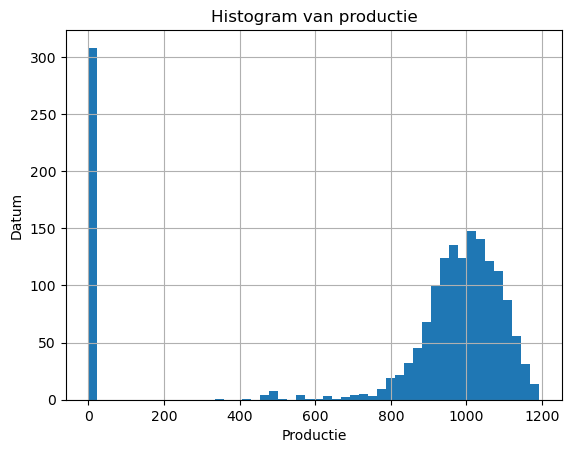

In [6]:
# Histogram van de 'production' kolom
BRU_df['production'] = BRU_df['production'].replace({'#MV': np.nan})  # Vervangt '#MV' door NaN
BRU_df['production'] = BRU_df['production'].astype(float)  # Zorg ervoor dat de kolom numeriek is
BRU_df['production'].hist(bins=50)

# Toon het histogram
plt.title('Histogram van productie')
plt.xlabel('Productie')
plt.ylabel('Datum')
plt.show()

In [7]:
# Definieer het pad naar de map met de JSON-bestanden
map_pad = os.path.join(input_path, 'data_productie', 'daily_production', 'STO')

# Lijst om DataFrames van alle JSON-bestanden op te slaan
dataframes = []

# Itereer over alle bestanden in de map
for bestandsnaam in os.listdir(map_pad):
    if bestandsnaam.endswith(".json"):  # Alleen JSON-bestanden verwerken
        # Volledig pad naar het JSON-bestand
        volledig_pad = os.path.join(map_pad, bestandsnaam)
        
        # JSON-bestand inlezen als DataFrame
        with open(volledig_pad, 'r') as f:
            json_data = json.load(f)
            df = pd.DataFrame([json_data])
        
        # DataFrame toevoegen aan de lijst
        dataframes.append(df)

# Concateneren van alle DataFrames tot één DataFrame
STO_df = pd.concat(dataframes, ignore_index=True)

# Weergave van het samengevoegde DataFrame
STO_df

,DoW,hour,minute,date,maintenance,prod_loss,prod_loss_perc,production
0,Monday,1,0,01-01-2018 00:00:00.0000,No,9,3,265
1,Tuesday,1,0,01-02-2018 00:00:00.0000,No,9,3,265
2,Wednesday,1,0,01-03-2018 00:00:00.0000,No,18,6,256
3,Thursday,1,0,01-04-2018 00:00:00.0000,No,22,8,252
4,Friday,1,0,01-05-2018 00:00:00.0000,No,31,11,243
...,...,...,...,...,...,...,...,...
1825,Saturday,1,0,12-31-2022 00:00:00.0000,No,51,19,223
1826,Sunday,1,0,01-01-2023 00:00:00.0000,No,53,20,221
1827,Monday,1,0,01-02-2023 00:00:00.0000,No,61,22,213
1828,Tuesday,1,0,01-03-2023 00:00:00.0000,No,70,25,204


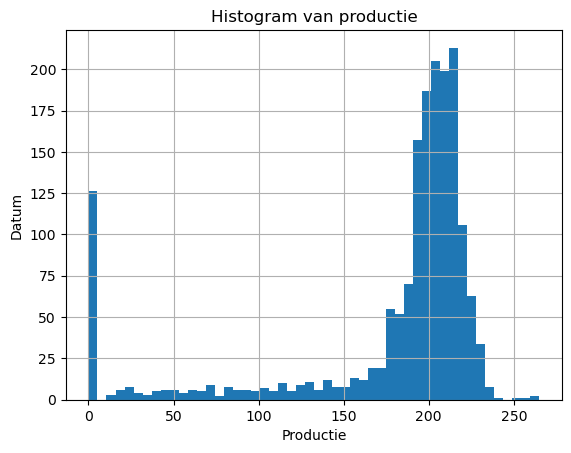

In [67]:
# Histogram van de 'production' kolom
STO_df['production'] = STO_df['production'].replace({'#MV': np.nan})  # Vervangt '#MV' door NaN
STO_df['production'] = STO_df['production'].astype(float)  # Zorg ervoor dat de kolom numeriek is
STO_df['production'].hist(bins=50)

# Toon het histogram
plt.title('Histogram van productie')
plt.xlabel('Productie')
plt.ylabel('Datum')
plt.show()